#문제1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
st=pd.read_csv('state_x77.csv')
sd=pd.read_csv('state_division.csv')

In [3]:
print(st.describe())
print(sd.describe())

         Population       Income  Illiteracy   Life_Exp    Murder    HS_Grad  \
count     50.000000    50.000000   50.000000  50.000000  50.00000  50.000000   
mean    4246.420000  4435.800000    1.170000  70.878600   7.37800  53.108000   
std     4464.491433   614.469939    0.609533   1.342394   3.69154   8.076998   
min      365.000000  3098.000000    0.500000  67.960000   1.40000  37.800000   
25%     1079.500000  3992.750000    0.625000  70.117500   4.35000  48.050000   
50%     2838.500000  4519.000000    0.950000  70.675000   6.85000  53.250000   
75%     4968.500000  4813.500000    1.575000  71.892500  10.67500  59.150000   
max    21198.000000  6315.000000    2.800000  73.600000  15.10000  67.300000   

            Frost           Area  
count   50.000000      50.000000  
mean   104.460000   70735.880000  
std     51.980848   85327.299622  
min      0.000000    1049.000000  
25%     66.250000   36985.250000  
50%    114.500000   54277.000000  
75%    139.750000   81162.500000  

### 1.state에 state_x77,state_division을 읽어서 저장

In [4]:
state = pd.concat([st, sd], axis=1) #concat을 이용해 두개의 데이터프레임을 병합.
state.head()

,State,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,Area,division
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,East South Central
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,Pacific
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,Mountain
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,West South Central
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361,Pacific


### 2.문맹률과 수입 사이 연관성(산점도 상관계수)

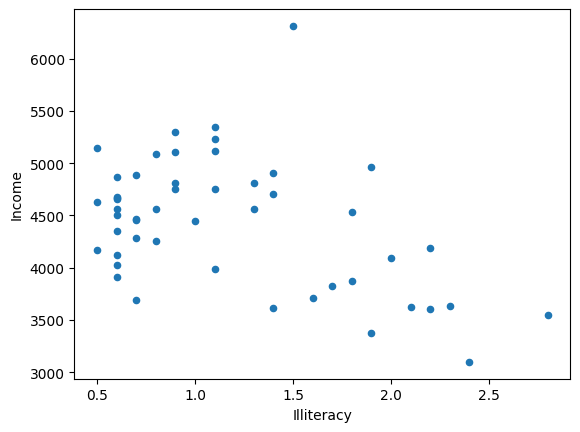

In [5]:
state.plot.scatter(x='Illiteracy',y='Income')
plt.show() #산점도 형성

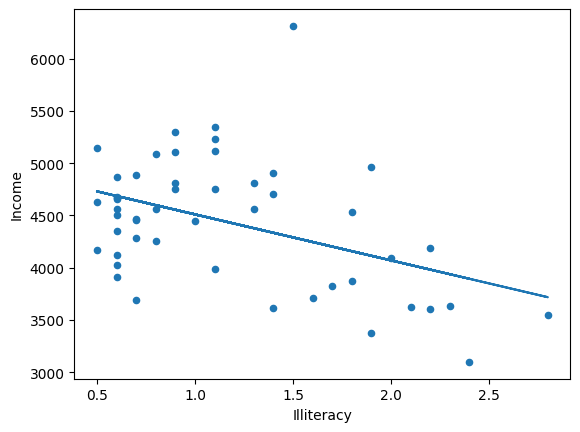

In [6]:
import numpy as np
state.plot.scatter(x='Illiteracy',y='Income')
m,b=np.polyfit(state['Illiteracy'],state['Income'],1) #회귀식 계산
plt.plot(state['Illiteracy'],m*np.array(state['Illiteracy'])+b) #회귀선 출력
plt.show()

In [7]:
state['Illiteracy'].corr(state['Income'])

np.float64(-0.4370751855974173)

상관계수가 -0.5보다 작음
문맹률이 높을수록 수입이 줄어드는 것을 관찰 가능.

###3.수입과 기대수명

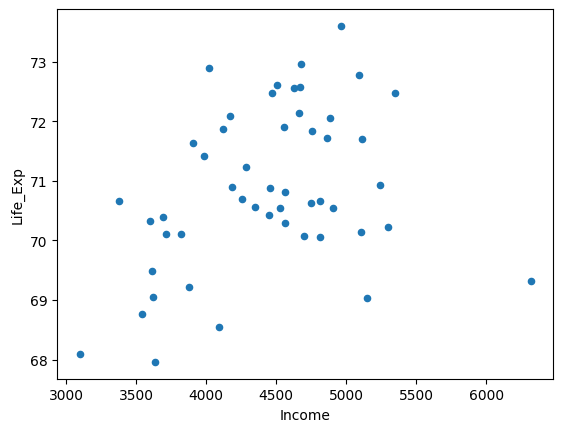

In [8]:
state.plot.scatter(x='Income',y='Life_Exp')
plt.show() #산점도 형성

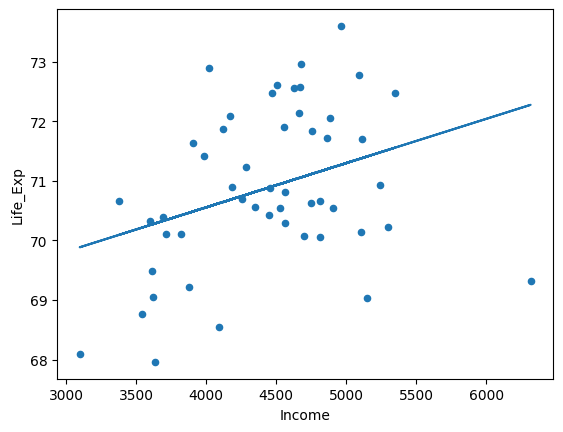

In [9]:

state.plot.scatter(x='Income',y='Life_Exp')
m,b=np.polyfit(state['Income'],state['Life_Exp'],1) #회귀식 계산
plt.plot(state['Income'],m*np.array(state['Income'])+b) #회귀선 출력
plt.show()

In [10]:
state['Income'].corr(state['Life_Exp'])

np.float64(0.34025533893636667)

수입이 증가할수록 기대수명이 증가한다는 경향성을 알 수 있으나 상관계수가 0.34로 0.5를 넘지 못함.



###4.전체 변수에 대한 다중 산점도.



In [11]:
state.columns

Index(['State', 'Population', 'Income', 'Illiteracy', 'Life_Exp', 'Murder',
       'HS_Grad', 'Frost', 'Area', 'division'],
      dtype='object')

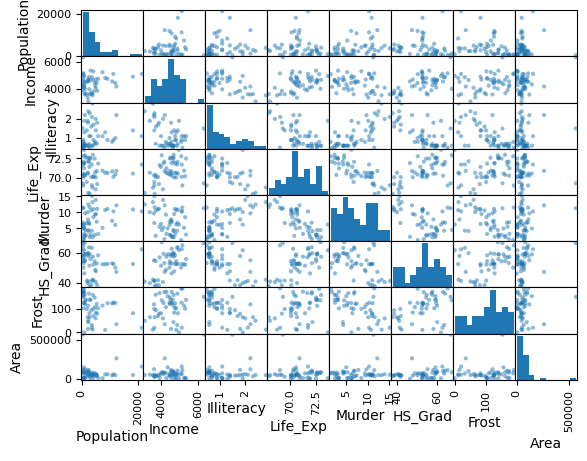

In [12]:
vars= ['State', 'Population', 'Income', 'Illiteracy', 'Life_Exp', 'Murder',
       'HS_Grad', 'Frost', 'Area', 'division']
pd.plotting.scatter_matrix(state[vars]) #다중 산점도 작성
plt.show()

###5.전체 변수에 대한 다중 상관계수


In [13]:
state.corr(numeric_only=True) #state열에 Alabama등의 문자열이 존재, 따라서 numeric_only로 숫자형만 고려

,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,Area
Population,1.000000,0.208228,0.107622,-0.068052,0.343643,-0.098490,-0.332152,0.022544
Income,0.208228,1.000000,-0.437075,0.340255,-0.230078,0.619932,0.226282,0.363315
Illiteracy,0.107622,-0.437075,1.000000,-0.588478,0.702975,-0.657189,-0.671947,0.077261
Life_Exp,-0.068052,0.340255,-0.588478,1.000000,-0.780846,0.582216,0.262068,-0.107332
Murder,0.343643,-0.230078,0.702975,-0.780846,1.000000,-0.487971,-0.538883,0.228390
HS_Grad,-0.098490,0.619932,-0.657189,0.582216,-0.487971,1.000000,0.366780,0.333542
Frost,-0.332152,0.226282,-0.671947,0.262068,-0.538883,0.366780,1.000000,0.059229
Area,0.022544,0.363315,0.077261,-0.107332,0.228390,0.333542,0.059229,1.000000


상관계수 값이 0.5보다 크거나 -0.5보다 작으면 두 변수의 상관성이 높다고 판단.

###6.지역별 주 인구수 합계


In [14]:
state.head(10)

,State,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,Area,division
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,East South Central
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,Pacific
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,Mountain
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,West South Central
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361,Pacific
5,Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766,Mountain
6,Connecticut,3100,5348,1.1,72.48,3.1,56.0,139,4862,New England
7,Delaware,579,4809,0.9,70.06,6.2,54.6,103,1982,South Atlantic
8,Florida,8277,4815,1.3,70.66,10.7,52.6,11,54090,South Atlantic
9,Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073,South Atlantic


In [15]:
d_p=state.groupby('division')['Population'].sum() #division에 따른 인구수 df형성
d_p

,Population
division,
East North Central,40945
East South Central,13516
Middle Atlantic,37269
Mountain,9625
New England,12187
Pacific,28274
South Atlantic,32946
West North Central,16691
West South Central,20868


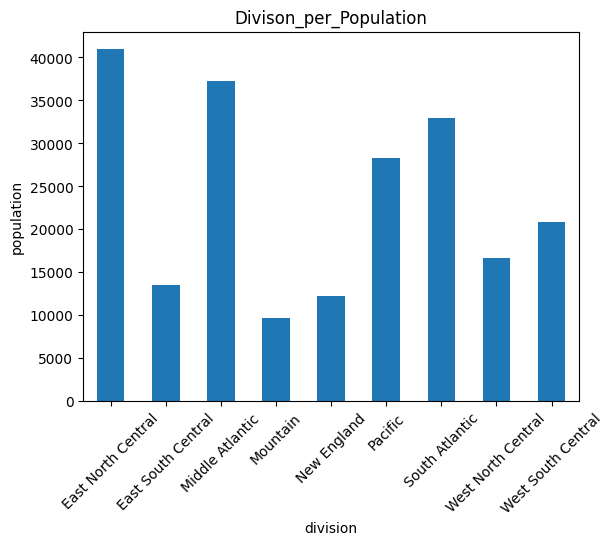

In [16]:
d_p.plot.bar(xlabel='division',ylabel='population',rot=45,title='Divison_per_Population')
plt.show()

###7. 고교 졸업률과 수입의 산점도, 지역별로 다른 색




In [17]:
state['division'].unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic'], dtype=object)

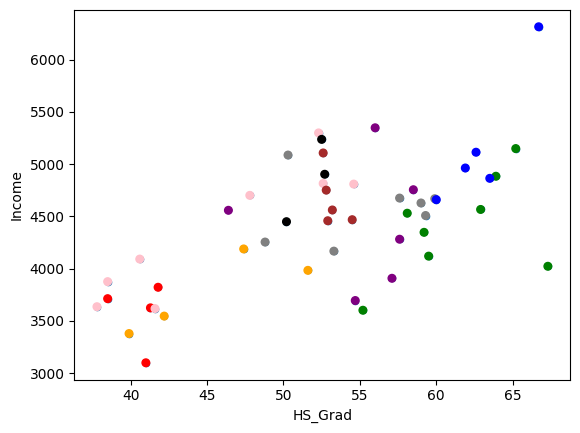

In [18]:
state.plot.scatter(x='HS_Grad',y='Income')
#division별 다른 색상 부여
dict = {
    'East South Central': 'red',
    'Pacific': 'blue',
    'Mountain': 'green',
    'West South Central': 'orange',
    'New England': 'purple',
    'South Atlantic': 'pink',
    'East North Central': 'brown',
    'West North Central': 'gray',
    'Middle Atlantic': 'black'
}
colors=list(dict[key] for key in state['division'])
plt.scatter(x = state['HS_Grad'],y = state['Income'],s=30,c=colors,marker='o')
plt.show() #산점도 형성

#문제2

###1.데이터읽기

In [19]:
sl=pd.read_csv('subway_line_1_8_20231231.csv')
address=pd.read_csv('seoul_subway_address_2023.csv')

In [20]:
sl.head()

,연번,수송일자,호선명,역번호,역명,승하차구분,승객유형,t06시간대이전,t06_07시간대,t07_08시간대,...,t15_16시간대,t16_17시간대,t17_18시간대,t18_19시간대,t19_20시간대,t20_21시간대,t21_22시간대,t22_23시간대,t23_24시간대,t24시간대이후
0,1,2023-07-01,1,150,서울역,승차,일반,192,192,409,...,2989.0,3514.0,3409.0,2686.0,2347.0,1872.0,2209.0,1885.0,691.0,7.0
1,2,2023-07-01,1,150,서울역,승차,어린이,0,1,3,...,33.0,32.0,30.0,30.0,30.0,16.0,11.0,8.0,4.0,0.0
2,3,2023-07-01,1,150,서울역,승차,중고생,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2023-07-01,1,150,서울역,승차,청소년,0,3,12,...,47.0,52.0,54.0,46.0,47.0,47.0,54.0,34.0,13.0,0.0
4,5,2023-07-01,1,150,서울역,승차,우대권,88,105,212,...,580.0,608.0,560.0,381.0,265.0,277.0,197.0,121.0,31.0,2.0


In [21]:
address.head()

,연번,역번호,호선,역명,역전화번호,도로명주소,지번주소
0,1,150,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선)
1,2,151,1,시청,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선)
2,3,152,1,종각,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선)
3,4,153,1,종로3가,02-6110-1301,서울특별시 종로구 종로 지하129(종로3가),서울특별시 종로구 종로3가 10-5 종로3가역(1호선)
4,5,154,1,종로5가,02-6110-1291,서울특별시 종로구 종로 지하216(종로5가),서울특별시 종로구 종로5가 82-1 종로5가역(1호선)


###2.탑승객 데이터셋의 2호선 오전 8-9 탑승객 역별로 집계

In [22]:
l2 = sl[sl['호선명'] == 2].groupby('역번호')['t08_09시간대'].sum() #2호선 탑승객에 대해서, 역번호 별로/시간대에 맞게 집계
l2.head()

,t08_09시간대
역번호,
201,1076232
202,1709686
203,910445
204,428498
205,313687


###3.탑승객과 역주소 데이터 병합, 위도 경도 추가

In [23]:
print(sl.columns, sl.dtypes)
print(address.columns, address.dtypes)


Index(['연번', '수송일자', '호선명', '역번호', '역명', '승하차구분', '승객유형', 't06시간대이전',
       't06_07시간대', 't07_08시간대', 't08_09시간대', 't09_10시간대', 't10_11시간대',
       't11_12시간대', 't12_13시간대', 't13_14시간대', 't14_15시간대', 't15_16시간대',
       't16_17시간대', 't17_18시간대', 't18_19시간대', 't19_20시간대', 't20_21시간대',
       't21_22시간대', 't22_23시간대', 't23_24시간대', 't24시간대이후'],
      dtype='object') 연번             int64
수송일자          object
호선명            int64
역번호            int64
역명            object
승하차구분         object
승객유형          object
t06시간대이전       int64
t06_07시간대      int64
t07_08시간대      int64
t08_09시간대      int64
t09_10시간대    float64
t10_11시간대    float64
t11_12시간대    float64
t12_13시간대    float64
t13_14시간대    float64
t14_15시간대    float64
t15_16시간대    float64
t16_17시간대    float64
t17_18시간대    float64
t18_19시간대    float64
t19_20시간대    float64
t20_21시간대    float64
t21_22시간대    float64
t22_23시간대    float64
t23_24시간대    float64
t24시간대이후     float64
dtype: object
Index(['연번', '역번호', '호선', '역명', '역전화번호', '도로명주소', '지

In [24]:
all = pd.merge(sl, address, on=['역번호'], how='left') #merge로 sl오른쪽에 address 병합
all.head(3)

,연번_x,수송일자,호선명,역번호,역명_x,승하차구분,승객유형,t06시간대이전,t06_07시간대,t07_08시간대,...,t21_22시간대,t22_23시간대,t23_24시간대,t24시간대이후,연번_y,호선,역명_y,역전화번호,도로명주소,지번주소
0,1,2023-07-01,1,150,서울역,승차,일반,192,192,409,...,2209.0,1885.0,691.0,7.0,1,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선)
1,2,2023-07-01,1,150,서울역,승차,어린이,0,1,3,...,11.0,8.0,4.0,0.0,1,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선)
2,3,2023-07-01,1,150,서울역,승차,중고생,0,0,0,...,0.0,0.0,0.0,0.0,1,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선)


In [25]:
!pip install folium
import requests
import requests
import folium


In [26]:
from IPython.utils.text import list_strings #지도 작성을 위한 준비
def geocode_kakao(address):
  url='https://dapi.kakao.com/v2/local/search/address.json'
  headers={'Authorization':'KakaoAK c24cc35c9a9994cf2b9d881637ce0c19'}
  params={'query':address}

  resp=requests.get(url,headers=headers,params=params)
  resp.raise_for_status()
  data=resp.json()
  if len(data['documents'])==0:
    raise ValueError("검색 결과가 없습니다. 주소를 다시 확인해주세요.")

  doc=data['documents'][0]
  lat=float(doc['y'])
  lng=float(doc['x'])

  return[lat,lng]

def add_coordinates_to_dataframe(df,addr_col):
  lats=[]
  lngs=[]
  for addr in df[addr_col]:
    lat,lng=geocode_kakao(addr)
    lats.append(lat)
    lngs.append(lng)
  df["decimalLatitude"]=lats
  df['decimalLongtitude']=lngs
  return df

In [27]:
len(all)

657553

In [28]:
test = all.head(5).copy()
df_test = add_coordinates_to_dataframe(test, '도로명주소')
df_test


,연번_x,수송일자,호선명,역번호,역명_x,승하차구분,승객유형,t06시간대이전,t06_07시간대,t07_08시간대,...,t23_24시간대,t24시간대이후,연번_y,호선,역명_y,역전화번호,도로명주소,지번주소,decimalLatitude,decimalLongtitude
0,1,2023-07-01,1,150,서울역,승차,일반,192,192,409,...,691.0,7.0,1,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),37.557159,126.972555
1,2,2023-07-01,1,150,서울역,승차,어린이,0,1,3,...,4.0,0.0,1,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),37.557159,126.972555
2,3,2023-07-01,1,150,서울역,승차,중고생,0,0,0,...,0.0,0.0,1,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),37.557159,126.972555
3,4,2023-07-01,1,150,서울역,승차,청소년,0,3,12,...,13.0,0.0,1,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),37.557159,126.972555
4,5,2023-07-01,1,150,서울역,승차,우대권,88,105,212,...,31.0,2.0,1,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선),37.557159,126.972555


지역이 중복되어 처리시간이 너무 지연. 따라서 중복 제거

In [29]:
unique_addr = all[['도로명주소', '역명_x']].drop_duplicates().reset_index(drop=True) #각 역의 도로명 주소로 구성된 df 생성
print(unique_addr.head())
print(len(unique_addr))

                        도로명주소  역명_x
0  서울특별시 중구 세종대로 지하2(남대문로 5가)   서울역
1     서울특별시 중구 세종대로 지하101(정동)    시청
2     서울특별시 종로구 종로 지하55(종로1가)    종각
3    서울특별시 종로구 종로 지하129(종로3가)  종로3가
4    서울특별시 종로구 종로 지하216(종로5가)  종로5가
262


In [30]:
station_location= add_coordinates_to_dataframe(unique_addr, '도로명주소') # 위도, 경도를 추가


In [31]:
station_location

,도로명주소,역명_x,decimalLatitude,decimalLongtitude
0,서울특별시 중구 세종대로 지하2(남대문로 5가),서울역,37.557159,126.972555
1,서울특별시 중구 세종대로 지하101(정동),시청,37.565439,126.976983
2,서울특별시 종로구 종로 지하55(종로1가),종각,37.570214,126.983240
3,서울특별시 종로구 종로 지하129(종로3가),종로3가,37.570427,126.992029
4,서울특별시 종로구 종로 지하216(종로5가),종로5가,37.570908,127.001917
...,...,...,...,...
257,경기도 성남시 수정구 산성대로 지하365(신흥동),단대오거리,37.445143,127.156688
258,경기도 성남시 수정구 산성대로 지하280(신흥동),신흥,37.441184,127.148108
259,경기도 성남시 수정구 산성대로 지하200(수진동),수진,37.437459,127.140352
260,경기도 성남시 수정구 산성대로 지하100(수진동),모란,37.433850,127.129551


###4. 지도의 중심점 계산

In [32]:
center=[station_location["decimalLatitude"].mean(),
        station_location["decimalLongtitude"].mean()]
center

[np.float64(37.546323638582415), np.float64(127.00827163187057)]

###5.역의 위치를 지도 위에 마커로 표시

In [33]:
map=folium.Map(location=center,zoom_start=10)

for i in range(len(station_location)):
  lat=station_location.loc[i,'decimalLatitude']
  lng=station_location.loc[i,'decimalLongtitude']
  name=station_location.loc[i,'역명_x']

  folium.Marker(
      location=[lat,lng],
      icon=folium.Icon(color='red',icon='star'),
      popup=name).add_to(map)

In [34]:
map

###6.역별 탑승객수를 역 위치에 원으로 표시, 역 이름도 표시

In [35]:
# 시간대 컬럼들만 자동으로 추출
time_cols = [c for c in all.columns if '시간대' in c]
# 추출한 시간대 columns를 행 기준으로 전부 더해서 total_passenger라는 새 column을 생성
all['total_passenger'] = all[time_cols].sum(axis=1)
# 역명_x와 total_passenger column으로 구성되는 df 생성.
pax_by_station = (all.groupby('역명_x', as_index=False)['total_passenger'].sum())
pax_by_station.head()


,역명_x,total_passenger
0,가락시장,4777007.0
1,가산디지털단지,11098430.0
2,강남,21583912.0
3,강남구청,4626649.0
4,강동,4979223.0


In [36]:
#역명_x를 key로 두 df를 merge
station_with_pax = station_location.merge(pax_by_station,on='역명_x',how='left')

station_with_pax.head()


,도로명주소,역명_x,decimalLatitude,decimalLongtitude,total_passenger
0,서울특별시 중구 세종대로 지하2(남대문로 5가),서울역,37.557159,126.972555,19855905.0
1,서울특별시 중구 세종대로 지하101(정동),시청,37.565439,126.976983,14171034.0
2,서울특별시 종로구 종로 지하55(종로1가),종각,37.570214,126.983240,10494206.0
3,서울특별시 종로구 종로 지하129(종로3가),종로3가,37.570427,126.992029,14676823.0
4,서울특별시 종로구 종로 지하216(종로5가),종로5가,37.570908,127.001917,7061262.0


In [37]:
import numpy as np
#기존 코드로 진행시 원이 너무 커져 지도 전체가 붉게 표시.
#승객 최댓값으로 상대값 부여 -> 지도전체가 붉게 표시되는 걸 방지
max_pax = station_with_pax.total_passenger.max()
#최대 승객 수인 역의 반지름이 약 20이 되도록 정규화 상수 생성
scale = 20 / np.sqrt(max_pax)


In [38]:
import numpy as np
import folium

m = folium.Map(location=center, zoom_start=11)

max_pax = station_with_pax.total_passenger.max()
scale = 20 / np.sqrt(max_pax)

for i in range(len(station_with_pax)):
    radius = max(3, np.sqrt(station_with_pax.total_passenger.iloc[i]) * scale)

    folium.CircleMarker(
        location=[
            station_with_pax.decimalLatitude.iloc[i],
            station_with_pax.decimalLongtitude.iloc[i]
        ],
        radius=radius,
        color='red',
        stroke=False,
        fill=True,
        fill_opacity=0.5,
        # popup을 통해 각 원을 클릭했을때만 역명이 출력되도록 함.
        popup=f"{station_with_pax.역명_x.iloc[i]} : {station_with_pax.total_passenger.iloc[i]:,}명"
    ).add_to(m)

m



#문제3

### 워드클라우드 시각화

In [39]:
!pip install konlpy
!pip install WordCloud
!apt-get install fonts-nanum* -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 37.1 MB/s eta 0:00:00
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import konlpy

In [41]:
txt = pd.read_fwf('반기문_국회_연설문.txt').iloc[:,0] #txt 파일 읽기.
txt

,"""유엔과 한국: 함께 이루는 인류의 꿈"""
0,"존경하는 국민 여러분, 존경하는 강창희 국회의장님과 국회의원 여러분, 그리고 주한 ..."
1,"한국과 유엔의 길고 특별한 인연을 생각할 때, 저의 두 번째 임기를 시작하면서 대한..."
2,한국의 눈부신 발전은 유엔과 함께 이루어왔다고 해도 과언이 아닐 것입니다. 한국과 ...
3,유엔의 도움으로 한국은 전쟁의 참상을 극복하고 짧은 기간 동안 놀라운 경제발전과 성...
4,저는 세계 각국을 다닐 때마다 한국의 민주화와 경제개발 경험을 소개하고 있습니다. ...
...,...
74,"유엔이 추구하는 꿈, ""우리가 원하는 미래: 더 안전하고 더 살기 좋은 세상""을 만..."
75,유엔 사무총장 취임 이래 저를 한결같이 성원해 주신 모든 국민 여러분께 이 자리를 ...
76,저는 유엔 사무총장에 취임한 첫 날부터 솔선수범하며 일신 우일신하는 자세로 지내왔습...
77,"대한민국의 앞날에 무궁한 영광이 깃들고, 국민 여러분께 만복이 충만하시기를 빕니다."


In [42]:
kkma=konlpy.tag.Kkma()

In [43]:
nouns = txt.apply(kkma.nouns) #명사만 추출
nouns

,"""유엔과 한국: 함께 이루는 인류의 꿈"""
0,"[존경, 국민, 여러분, 강, 강창희, 창희, 국회, 장님, 국회의원, 주한, 외교..."
1,"[한국, 유엔, 특별, 인연, 생각, 때, 저, 번째, 임기, 시작, 대한, 대한민..."
2,"[한국, 발전, 유엔, 과언, 특별, 관계, 1948, 1948년, 년, 시작, 최..."
3,"[유엔, 도움, 한국, 전쟁, 참상, 극복, 기간, 동안, 경제, 경제발전, 발전,..."
4,"[저, 세계, 각국, 때, 한국, 민주화, 경제, 경제개발, 개발, 경험, 소개, ..."
...,...
74,"[유엔, 추구, 꿈, 우리, 미래, 안전, 세상, 을, 여정, 대한, 대한민국, 민..."
75,"[유엔, 사무총장, 취임, 이래, 저, 성원, 주신, 모든, 국민, 여러분, 자리,..."
76,"[저, 유엔, 사무총장, 취임, 날, 솔선수범, 일신, 우, 우일신, 자세, 앞, ..."
77,"[대한, 대한민국, 민국, 앞날, 무궁, 영광, 국민, 여러분, 만복, 충만]"


In [44]:
nouns=nouns.explode() #한 행에 하나의 명사만 있도록 구조 변경
nouns

,"""유엔과 한국: 함께 이루는 인류의 꿈"""
0,존경
0,국민
0,여러분
0,강
0,강창희
...,...
77,여러분
77,만복
77,충만
78,경청


In [45]:
#각 명사의 글자 수 기반으로 df_word df를 생성 후 글자 수가 2개 이상인 단어들만 추출
df_word=pd.DataFrame({'word':nouns})
df_word['count']=df_word['word'].str.len()
df_word=df_word.query('count>=2')
df_word

,word,count
0,존경,2
0,국민,2
0,여러분,3
0,강창희,3
0,창희,2
...,...,...
77,여러분,3
77,만복,2
77,충만,2
78,경청,2


In [46]:
#단어를 기준으로 그룹핑, 그룹별 단어의 빈도 계산
df_word=df_word.groupby('word',as_index=False)
df_word=df_word.count().sort_values('count',ascending=False)
df_word

,word,count
799,한국,37
544,유엔,30
422,세계,19
150,국제,18
147,국민,15
...,...,...
16,2010년,1
19,2030,1
852,효과적인,1
853,효율,1


In [47]:
#나눔 고딕 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!rm -rf ~/.cache/matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [48]:
import matplotlib.font_manager as fm
path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name=fm.FontProperties(fname=path,size=10).get_name()
plt.rc('font',family=font_name)
fm.fontManager.addfont(path)

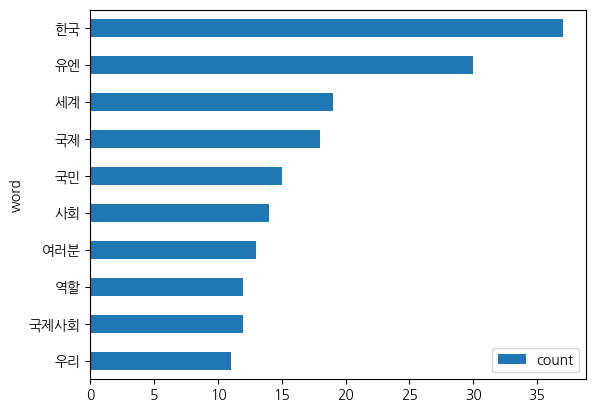

In [49]:
#빈도수 상위 10개 단어 시각화
df_top10=df_word.iloc[:10,:].sort_values('count',ascending=True)
df_top10.plot.barh(x='word',y='count')
plt.show()

In [50]:
dic_word=df_word.set_index('word').to_dict()['count']
dic_word

{'한국': 37,
 '유엔': 30,
 '세계': 19,
 '국제': 18,
 '국민': 15,
 '사회': 14,
 '여러분': 13,
 '국제사회': 12,
 '역할': 12,
 '우리': 11,
 '협력': 11,
 '평화': 10,
 '개발': 10,
 '세계적': 9,
 '생각': 9,
 '사무총장': 9,
 '노력': 9,
 '기대': 9,
 '기여': 8,
 '내외': 8,
 '지도자': 8,
 '미래': 8,
 '경험': 8,
 '귀빈': 8,
 '내외귀빈': 8,
 '존경': 8,
 '문제': 8,
 '희망': 8,
 '인권': 7,
 '국가': 7,
 '목표': 7,
 '필요': 7,
 '증진': 7,
 '민국': 6,
 '특별': 6,
 '사람': 6,
 '대한민국': 6,
 '대한': 6,
 '사업': 6,
 '도움': 6,
 '주의': 6,
 '경제': 6,
 '국회의원': 6,
 '적인': 6,
 '변화': 5,
 '평가': 5,
 '취임': 5,
 '달성': 5,
 '가능': 5,
 '자리': 5,
 '중요': 5,
 '여성': 5,
 '국회': 5,
 '이행': 5,
 '지속': 5,
 '지원': 5,
 '보편적': 5,
 '성공': 5,
 '추구': 4,
 '모든': 4,
 '분쟁': 4,
 '한반도': 4,
 '분야': 4,
 '북한': 4,
 '대처': 4,
 '최근': 4,
 '개선': 4,
 '사례': 4,
 '감사': 4,
 '대화': 4,
 '이야기': 4,
 '이상': 4,
 '대외': 4,
 '강화': 4,
 '세대': 4,
 '유지': 4,
 '안전': 4,
 '시기': 4,
 '기회': 4,
 '실현': 4,
 '인류': 4,
 '주민': 4,
 '계속': 4,
 '주도': 4,
 '적극적': 4,
 '2015': 4,
 '2015년': 4,
 '정부': 4,
 '민주주의': 4,
 '방문': 4,
 '확신': 4,
 '민주': 4,
 '활동': 4,
 '회의': 4,
 '가지': 4,
 '확대': 4,
 '한

In [51]:
wc=WordCloud(random_state=123,font_path=path,width=400,height=400,background_color='white')

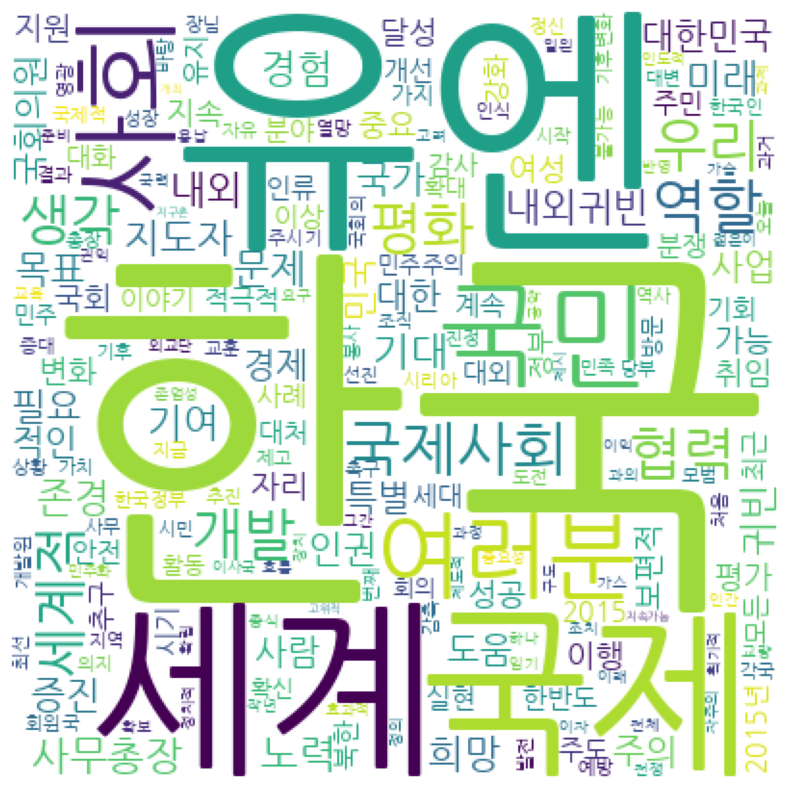

In [52]:
img_wordcloud=wc.generate_from_frequencies(dic_word)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.show()